<a href="https://colab.research.google.com/github/abbyburkett/mushroom/blob/main/Edible_or_Poisonous%3F_Predicting_Mushroom_Safety_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project: Edible or Poisonous? Predicting Mushroom Safety with Machine Learning

**Names:** Abby Burkett, Wafae Benkassou

##Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##Introduction of the data set and variables:
 Write the background of the data set ( where the data was collected, how they collected the data, citation of the source ). Explain the shape and number of variables and display the data type of variables.

##Dataset: Mushroom Dataset

From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible. This categorical data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended.  This latter class was combined with the poisonous one.  The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

**Source:** UCI Machine Learning Repository

**Citation:** https://archive.ics.uci.edu/dataset/73/mushroom

In [2]:
#set the link as the url to read the data
url = "https://archive.ics.uci.edu/static/public/73/data.csv"

In [3]:
#Read the data
mushroom = pd.read_csv(url)

In [4]:
#Display the head of the data
mushroom.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [5]:
#Display the shape of the data
mushroom.shape

(8124, 23)

In [6]:
#Display the data types of the variables
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

1. cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s

3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y

4. bruises?:                 bruises=t,no=f

5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

6. gill-attachment:          attached=a,descending=d,free=f,notched=n

7. gill-spacing:             close=c,crowded=w,distant=d

8. gill-size:                broad=b,narrow=n

9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

10. stalk-shape:              enlarging=e,tapering=t

11. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?

12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y

16. veil-type:                partial=p,universal=u

17. veil-color:               brown=n,orange=o,white=w,yellow=y

18. ring-number:              none=n,one=o,two=t

19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z

20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y

21. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y

22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



##State your project goal.

Our goal of this project is to build classification models( Logistic Regression and Decision Tree) to predict if the mushroom is poisonous or edible based on other available input features from the data set you have chosen. We want to find the set of input features to allow the models to perform accurately.

##Data Cleaning and Preprocessing:
Check whether there are missing values. If you have missing values, use appropriate methods to handle such missing values. Convert the categorical variables into numerical categorical values. Check outliers through visualization and handle the outliers with appropriate methods.

In [7]:
# Check for missing values
missing_values = mushroom.isnull().sum()
missing_values

,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0
stalk-shape,0


In [8]:
# Drop rows with missing data in the 'stalk-root' column
mushroom_cleaned = mushroom.dropna(subset=['stalk-root'])
mushroom_cleaned.shape


(5644, 23)

In [9]:
mushroom_cleaned.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [10]:
categorical_columns = mushroom_cleaned.select_dtypes(include=['object']).columns
# Create a copy of the dataset for encoding
mushroom_encoded = mushroom_cleaned.copy()

# Convert each categorical variable into numeric categories using factorize
for col in categorical_columns:
    mushroom_encoded[col] = pd.factorize(mushroom_encoded[col])[0]

In [11]:
mushroom_encoded.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,1,1
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
3,0,1,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,1,3,0,1,1,0,1,...,0,0,0,0,0,1,1,2,1,1


In [12]:
# Check the new data types to ensure they are now numeric
mushroom_encoded.dtypes

,0
cap-shape,int64
cap-surface,int64
cap-color,int64
bruises,int64
odor,int64
gill-attachment,int64
gill-spacing,int64
gill-size,int64
gill-color,int64
stalk-shape,int64


In [13]:
# List the numeric columns for visualization
numeric_columns = mushroom_encoded.select_dtypes(include=['int', 'float']).columns

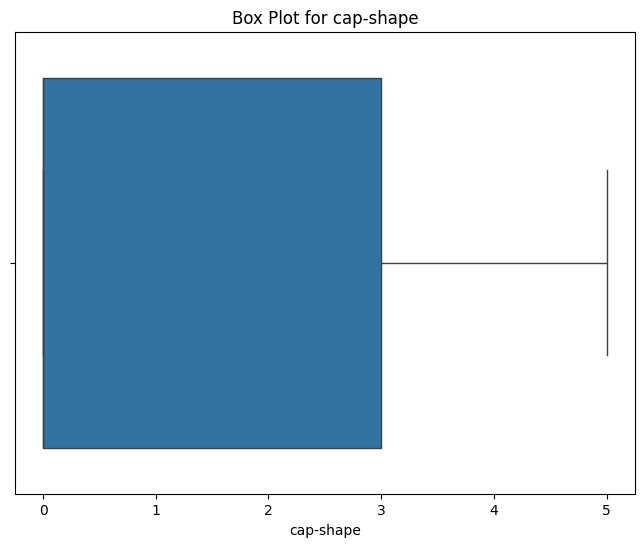

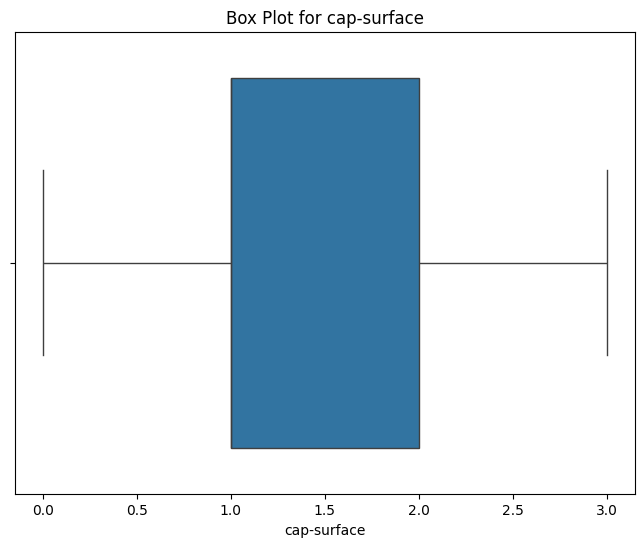

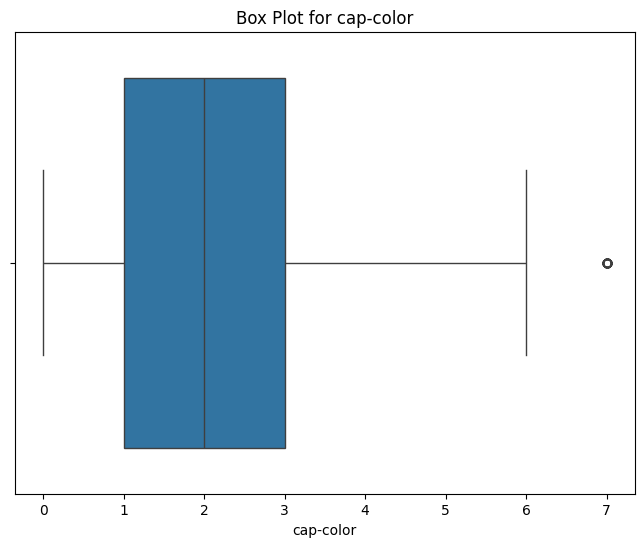

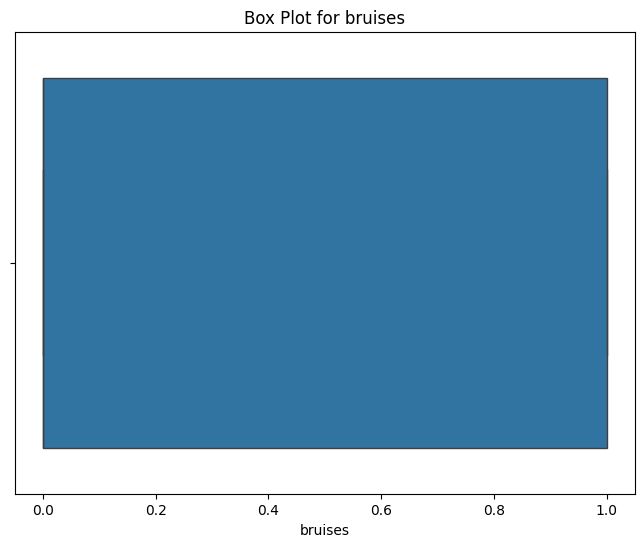

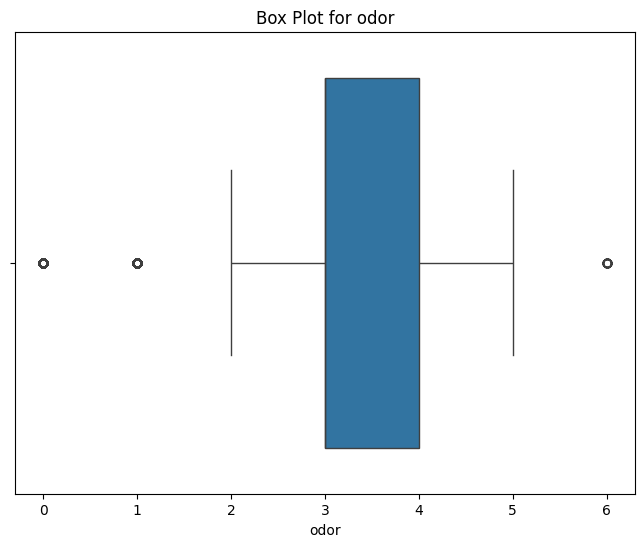

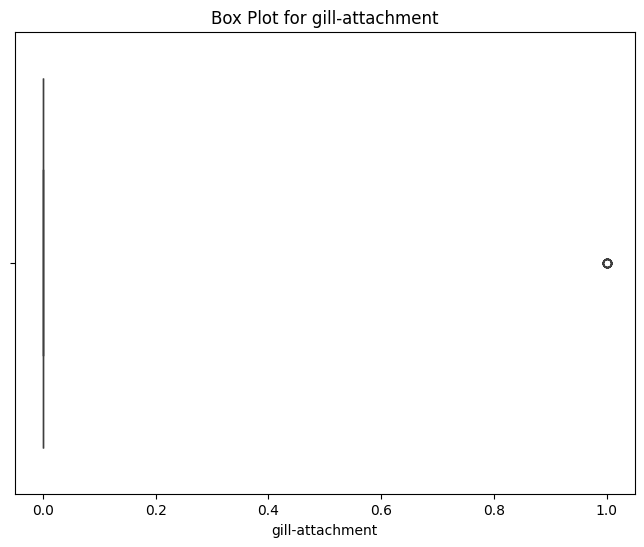

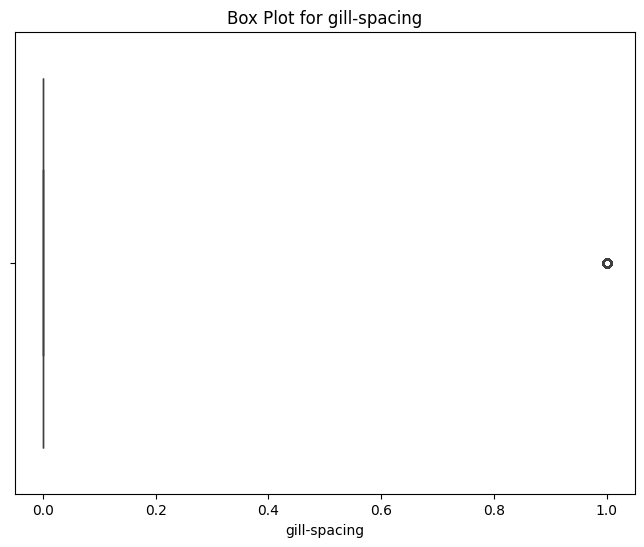

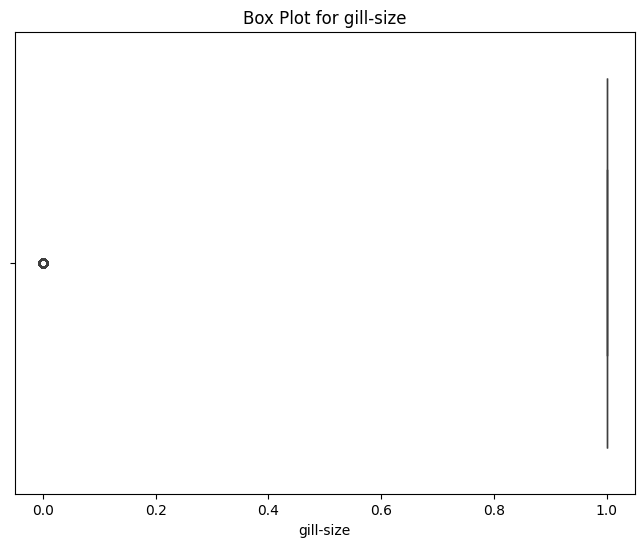

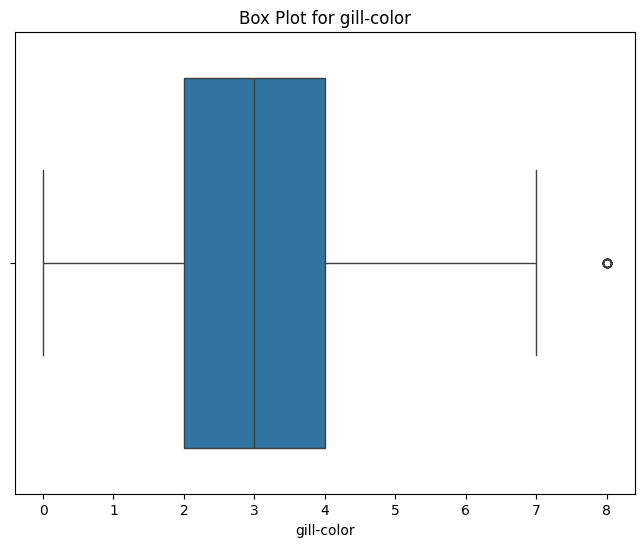

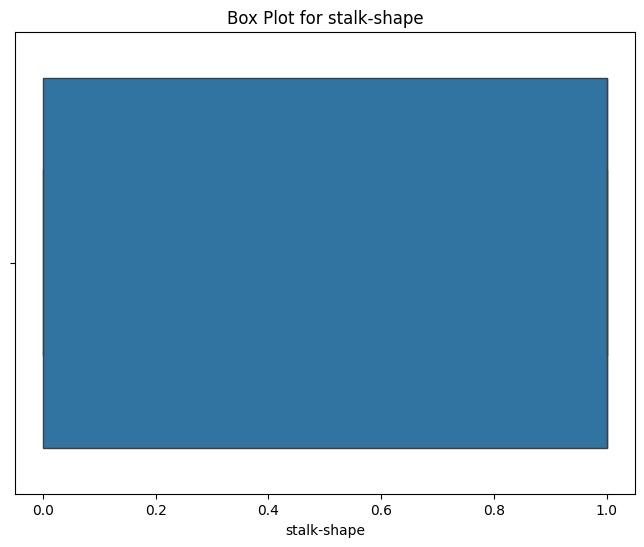

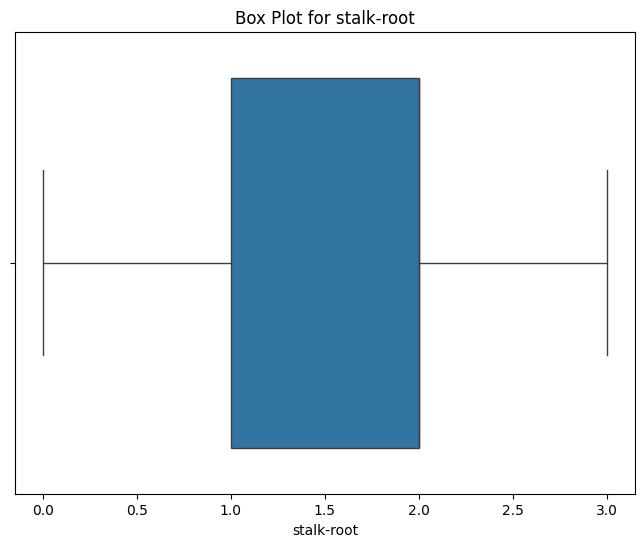

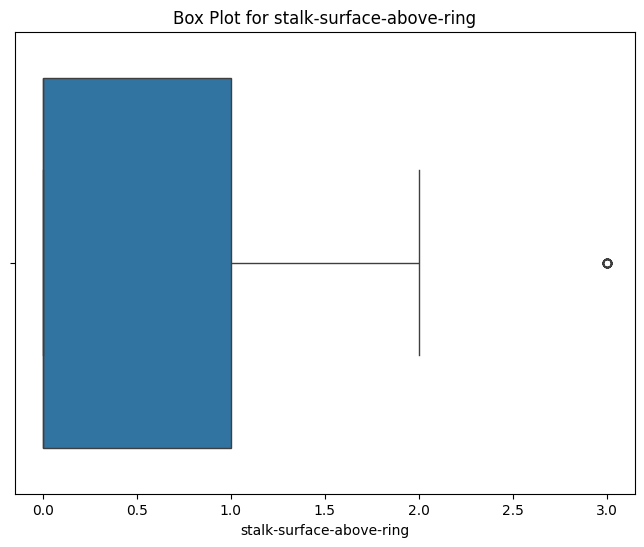

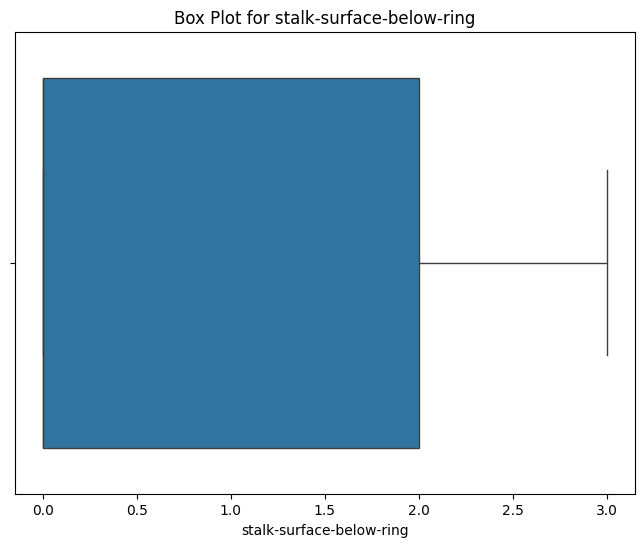

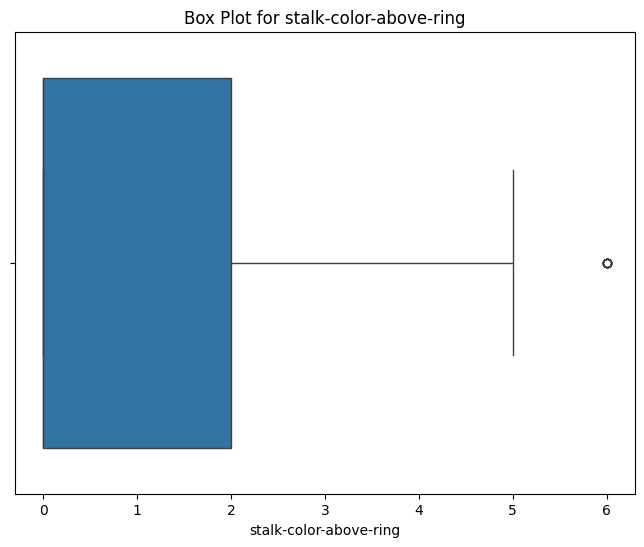

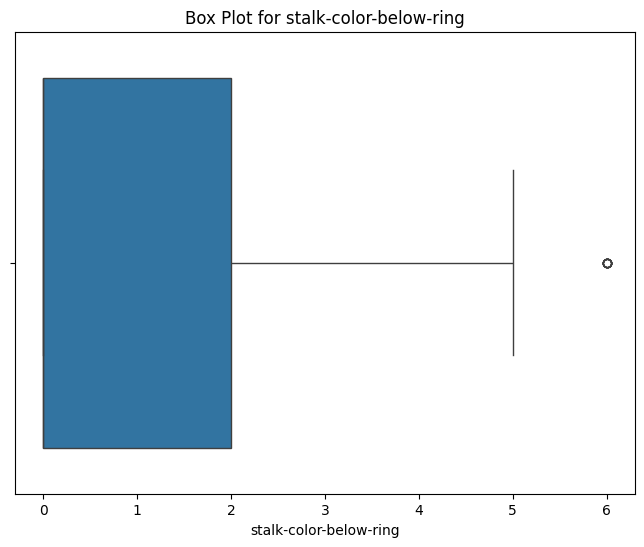

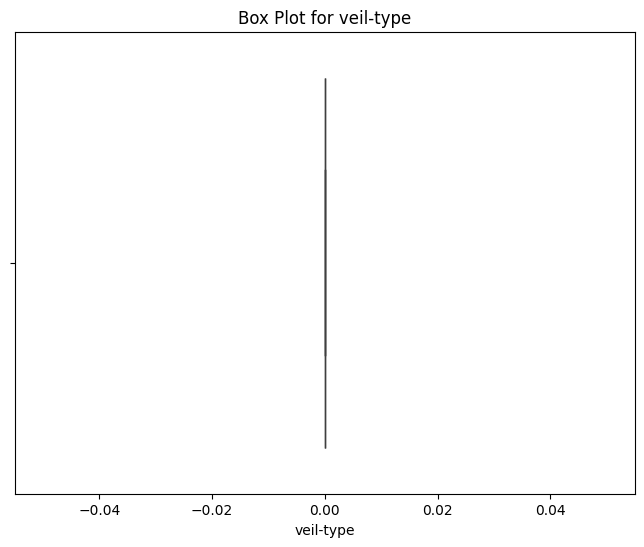

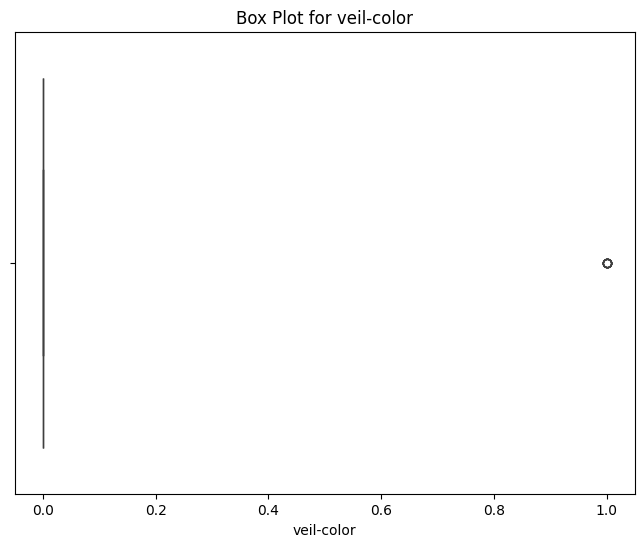

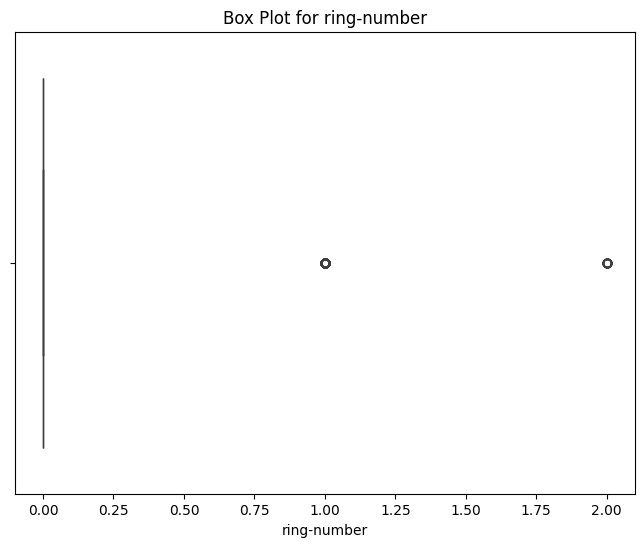

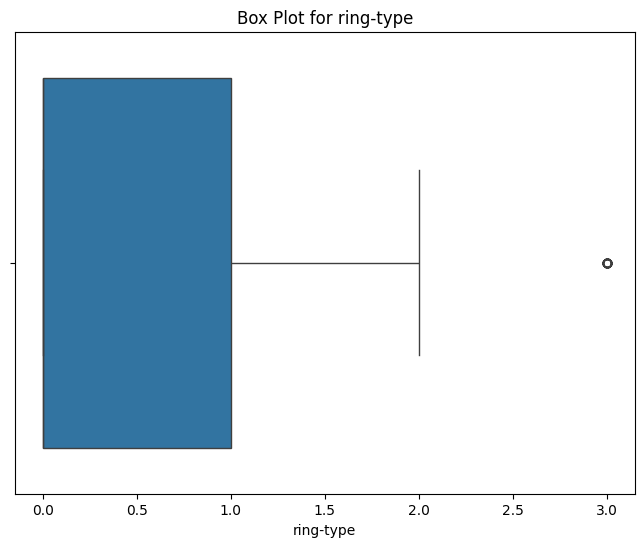

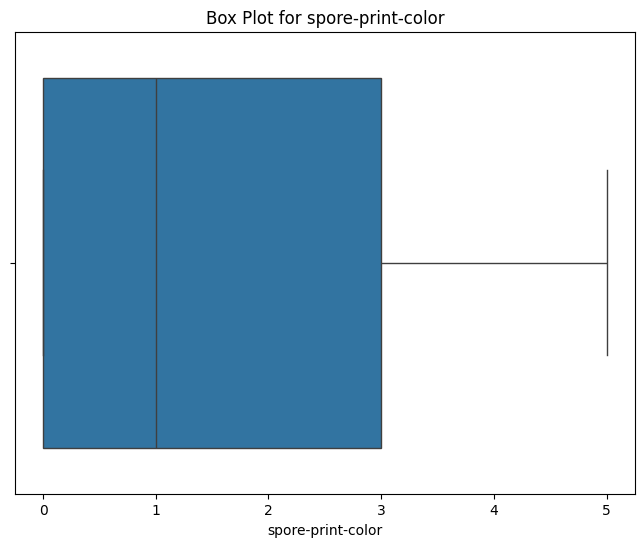

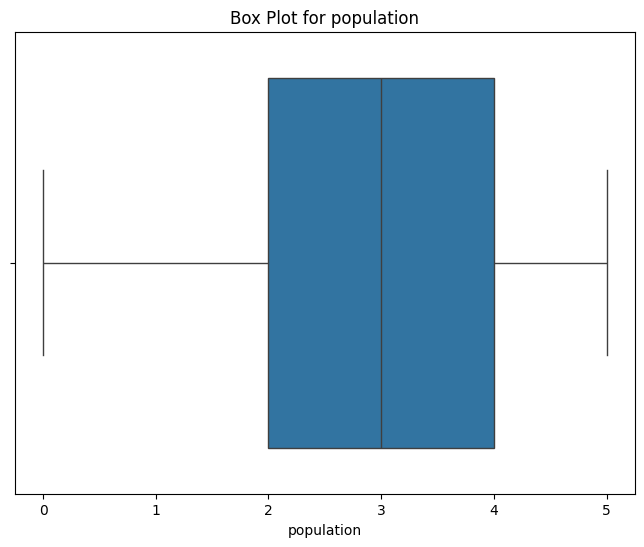

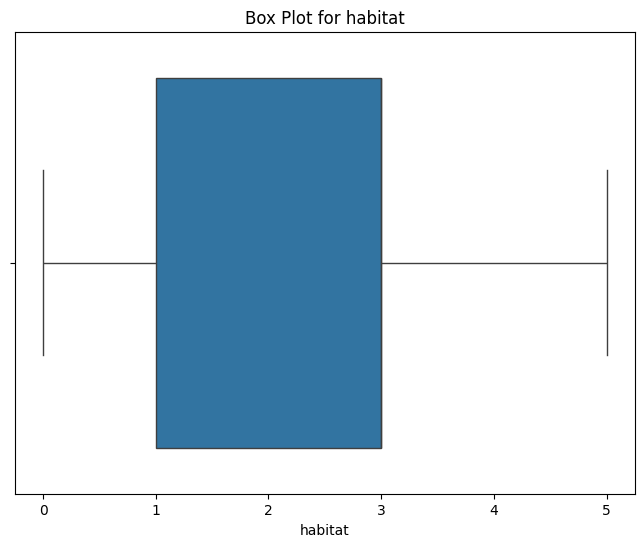

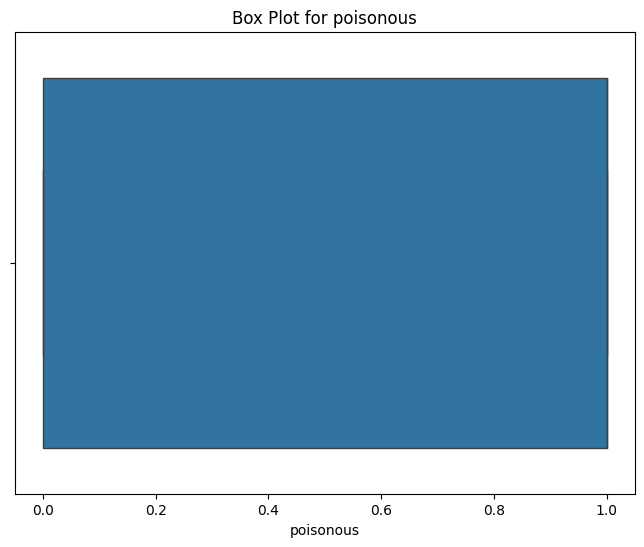

In [14]:
# Create box plots to visualize outliers
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=mushroom_encoded[column])
    plt.title(f"Box Plot for {column}")
    plt.show()

In [15]:
# Calculate the interquartile range for numerical columns
selected_columns = ['cap-color','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-surface-above-ring',
                    'stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-number','ring-type']
Q1 = mushroom_encoded[selected_columns].quantile(0.25)
Q3 = mushroom_encoded[selected_columns].quantile(0.75)
IQR = Q3 - Q1


In [16]:
# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
# Remove outliers based on the defined bounds
mushroom_no_outliers = mushroom_encoded[~((mushroom_encoded[selected_columns] < lower_bound) | (mushroom_encoded[selected_columns] > upper_bound)).any(axis=1)]

In [18]:
mushroom_no_outliers.shape

(3664, 23)

In [19]:
mushroom_no_outliers.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
2,1,0,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
7,1,1,2,0,2,0,0,1,1,0,...,0,0,0,0,0,0,1,0,2,1
10,0,1,1,0,2,0,0,1,2,0,...,0,0,0,0,0,0,1,1,1,1
22,1,1,1,0,2,0,0,1,0,0,...,0,0,0,0,0,0,1,0,2,1
24,1,0,2,0,2,0,0,1,2,0,...,0,0,0,0,0,0,0,0,2,1


##Visualization:
Visualize the distribution of each variable using barplot/histogram with density plot and the relationship between variables using various data visualization tools using Matplotlib and Seaborn.

In [22]:
# # Get the list of all columns except the target variable 'poisonous'
# features = [col for col in mushroom_no_outliers.columns if col != 'poisonous']

# # Set up the figure and axis grid
# fig, axes = plt.subplots(len(features), 1, figsize=(8, 5 * len(features)))

# # Iterate through each feature and plot the histogram
# for i, feature in enumerate(features):
#     sns.histplot(x=feature, data=mushroom_no_outliers, stat='count', kde=False, ax=axes[i])
#     axes[i].set_title(f'Distribution of {feature}')
#     axes[i].set_xlabel('')
#     axes[i].set_ylabel('Count')

# plt.tight_layout()
# plt.show()

These histograms show the distribution of each variable.

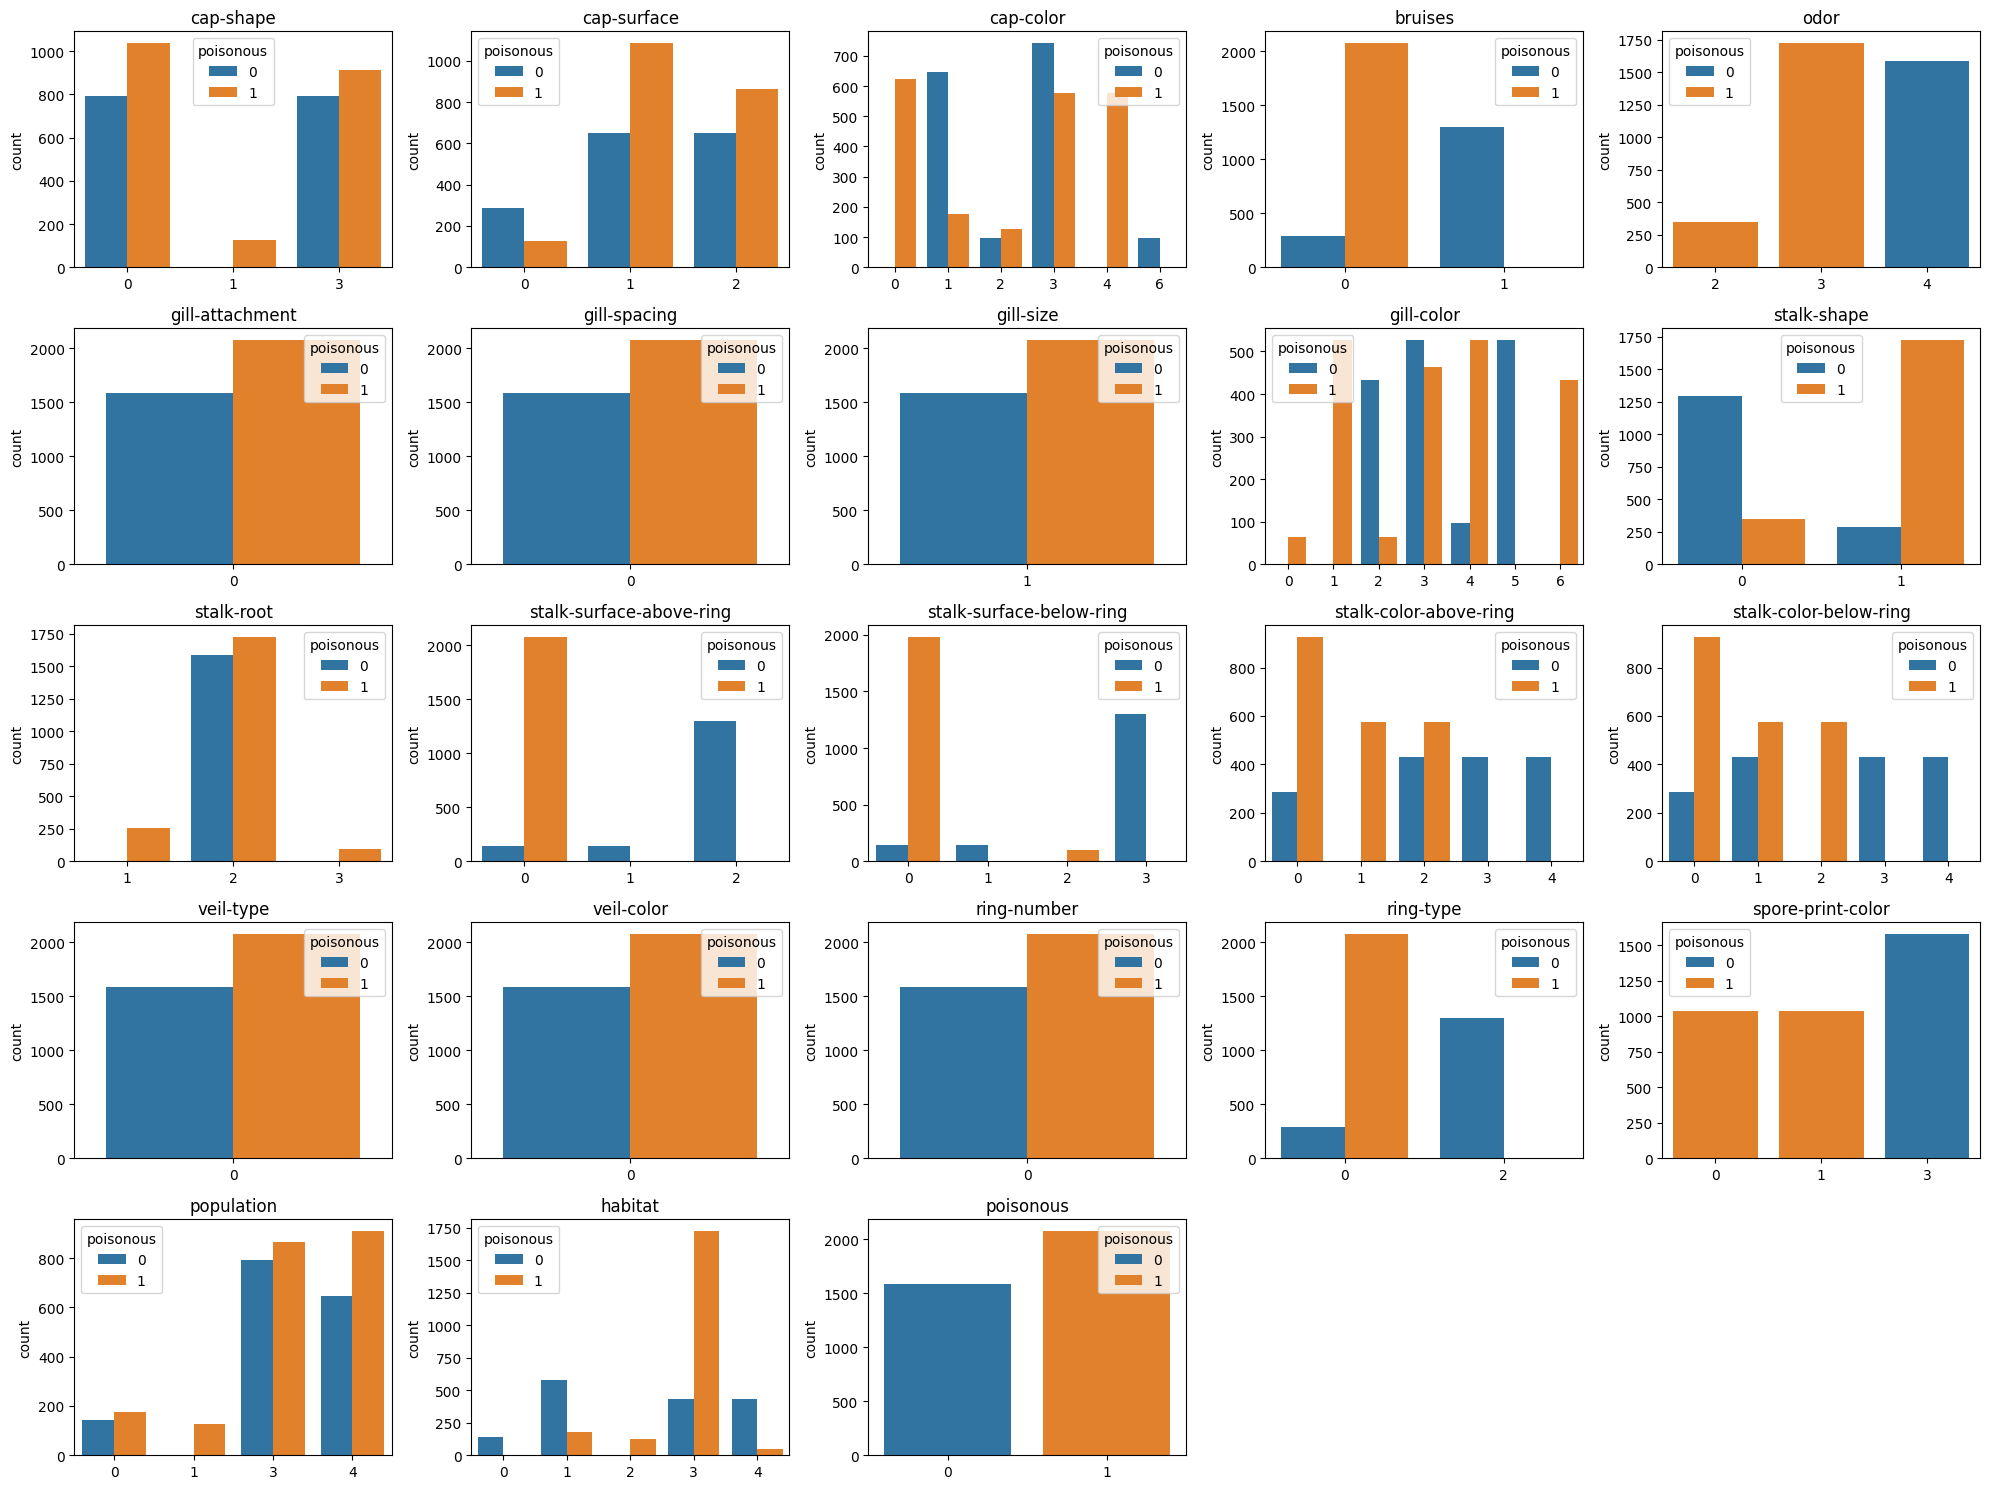

In [23]:
# Create count plots for all variables with hue set to the target variable (poisonous)
plt.figure(figsize=(20, 15))
for i, column in enumerate(mushroom_no_outliers.columns):
    plt.subplot(5, 5, i + 1)
    sns.countplot(x=column, hue='poisonous', data=mushroom_no_outliers)
    plt.title(f"{column}")
    plt.xlabel("")
plt.tight_layout()
plt.show()

poisonous = 0, edible= 1

1) gill-size = narrow, odor = foul, gill-color = buff, stalk-surface-above-ring = silky, stalk-surface-below-ring = silky, spore-print-color = chocolate -> more likely to be poisonous

2) bruises = true, odor = none, stalk-surface-above-ring = smooth, ring-type = pendant -> more likely to be edible

These plots show that mushrooms are more likely to be edible than poisonous

In [28]:
mushroom_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3664 entries, 2 to 5999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 3664 non-null   int64
 1   cap-surface               3664 non-null   int64
 2   cap-color                 3664 non-null   int64
 3   bruises                   3664 non-null   int64
 4   odor                      3664 non-null   int64
 5   gill-attachment           3664 non-null   int64
 6   gill-spacing              3664 non-null   int64
 7   gill-size                 3664 non-null   int64
 8   gill-color                3664 non-null   int64
 9   stalk-shape               3664 non-null   int64
 10  stalk-root                3664 non-null   int64
 11  stalk-surface-above-ring  3664 non-null   int64
 12  stalk-surface-below-ring  3664 non-null   int64
 13  stalk-color-above-ring    3664 non-null   int64
 14  stalk-color-below-ring    3664 non-null   int

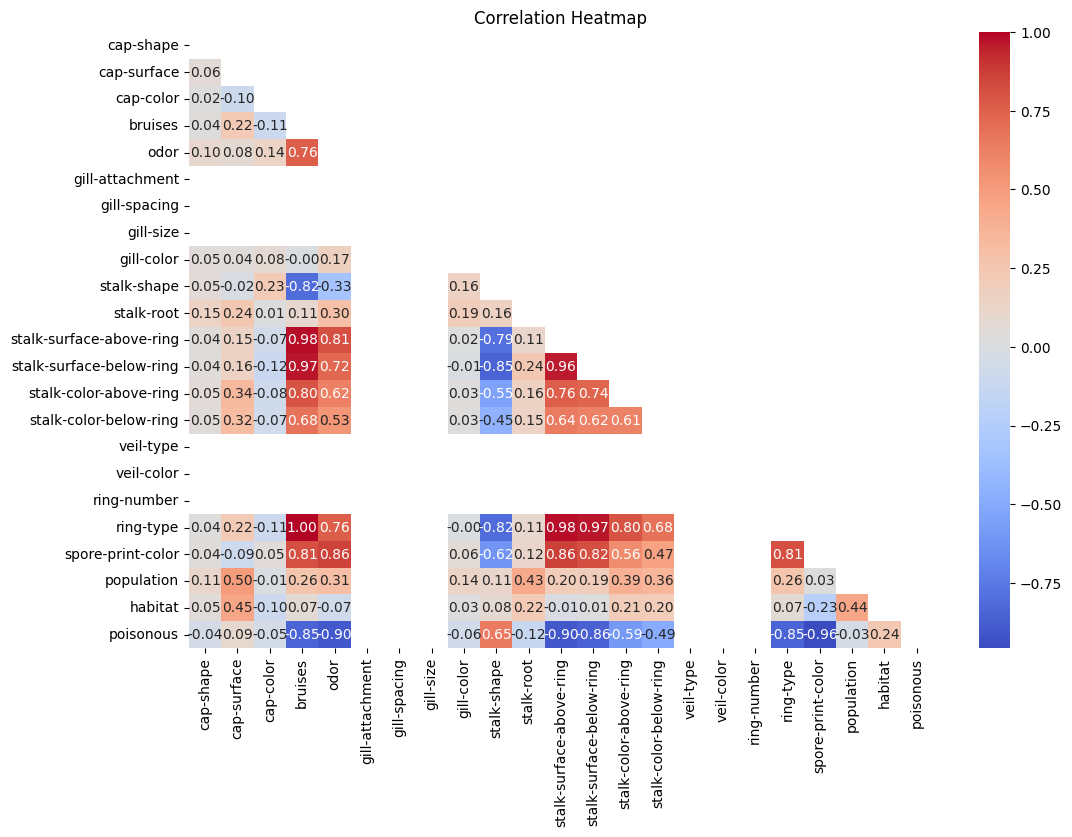

In [27]:
# Visualize the correlation between variables using a heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(mushroom_no_outliers.corr(), dtype=bool))
sns.heatmap(mushroom_no_outliers.corr(),mask =mask, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

This shows the correalation between each of the variables, some high correalation is bruises and stalk-surface-above-ring/below-ring.There is low correlation between spore-print-color and poisonous.

##Train/Test split and Normalization/Standardization:
Make X and y data, split into train/test set, and then normalize train and test input features X.

In [ ]:
X = mushroom_no_outliers.drop('poisonous', axis=1)
y = mushroom_no_outliers['poisonous']

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()



X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)

In [ ]:
# Fit the logistic regression model to the training data
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression( max_iter=2000)

lr.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2000)

##Build a base regression model and train/test, including all features.

 Calculate the performance evaluation metrics: accuracy, f1-score, precision, recall, sensitivity, specificity, and AUC.

## **Logistic Regression**

In [ ]:
# Evaluate the performance of the model on the test data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, recall_score, precision_score, roc_auc_score, roc_curve

In [ ]:
# Evaluate the performance of the model on the test data
y_pred = lr.predict(X_test_scaled)


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
true_negatives = conf_matrix[0, 0]
false_negatives = conf_matrix[1, 0]
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]
conf_matrix

array([[299,   0],
       [  0, 434]])

In [ ]:
# Calculate sensitivity and specificity
sensitivity = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

In [ ]:
# Predict probabilities for AUC calculation
y_pred_proba = lr.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)


In [ ]:
accuracy_base = accuracy_score(y_test, y_pred)
f1_base = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display performance metrics
print(f"Accuracy: {accuracy_base}")
print(f"f1-score: {f1_base}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"AUC: {auc}")

Accuracy: 1.0
f1-score: 1.0
Precision: 1.0
Recall: 1.0
Sensitivity: 1.0
Specificity: 1.0
AUC: 1.0


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       1.00      1.00      1.00       434

    accuracy                           1.00       733
   macro avg       1.00      1.00      1.00       733
weighted avg       1.00      1.00      1.00       733



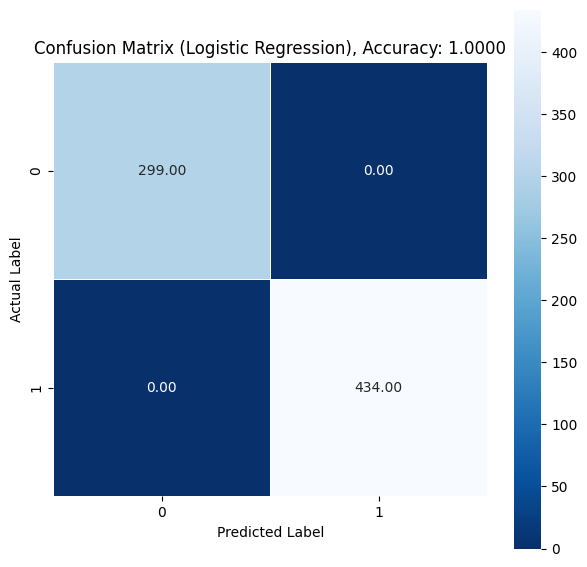

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix,
            annot=True,
            fmt=".2f",
            linewidths=.5,
            square=True,
            cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title(f'Confusion Matrix (Logistic Regression), Accuracy: {accuracy_base:.4f}')
plt.show()

There are no false negatives or false positive, showing how accurate our data is

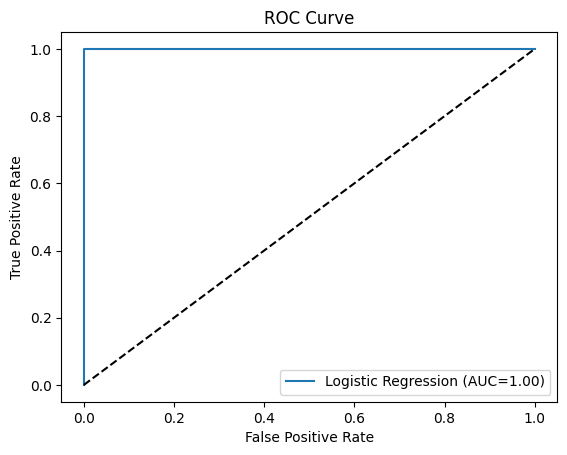

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Define fpr, tpr, and _ before plotting
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

AUC is 100%, this shows that the model is 100% accurate

##**Decision Tree**

In [ ]:
from sklearn.model_selection import train_test_split

# Assume 'mushroom_no_outliers' is your cleaned dataset
X = mushroom_no_outliers.drop('poisonous', axis=1)  # Features (all but the target)
y = mushroom_no_outliers['poisonous']  # Target variable (poisonous or edible)

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Build and train a Decision Tree model
dt = DecisionTreeClassifier(max_depth=5)  # Example constraint to prevent overfitting
dt.fit(X_train, y_train)  # Train the model on the training set


DecisionTreeClassifier(max_depth=5)

In [ ]:
# Export the decision tree to a Graphviz format
dot_data = export_graphviz(dt,
                           out_file=None,
                           feature_names=X.columns,
                           class_names=str(y.unique()),
                           filled=True,
                           rounded=False)

In [ ]:
import graphviz

In [ ]:
# Display the decision tree using Graphviz and set the size
graph = graphviz.Source(dot_data)
#graph.format = 'png'
graph.render('decision_tree', view=True, format='png', cleanup=True)
#graph.render('decision_tree', view=True, format='pdf', cleanup=True)

'decision_tree.png'

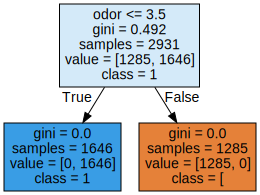

In [ ]:
graph

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Predict probabilities for AUC and ROC curve
y_pred_proba = dt.predict_proba(X_test)[:, 1]  # Get probabilities for positive class

# Calculate various performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Confusion Matrix to calculate sensitivity and specificity
conf_matrix = confusion_matrix(y_test, y_pred)

true_negatives = conf_matrix[0, 0]
false_negatives = conf_matrix[1, 0]
true_positives = conf_matrix[1, 1]
false_positives = conf_matrix[0, 1]

sensitivity = true_positives / (true_positives + false_negatives)  # Sensitivity
specificity = true_negatives / (true_negatives + false_positives)  # Specificity

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)

# Output performance metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("AUC:", auc)

# Generate a detailed classification report
print(classification_report(y_test, y_pred))


Accuracy: 1.0
F1 Score: 1.0
Precision: 1.0
Recall: 1.0
Sensitivity: 1.0
Specificity: 1.0
AUC: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       1.00      1.00      1.00       434

    accuracy                           1.00       733
   macro avg       1.00      1.00      1.00       733
weighted avg       1.00      1.00      1.00       733



##Select the best set of input features:
Utilize feature selection methods to select the best set of input features so that test prediction accuracy is optimal while maintaining model simplicity.

## **Logistic Regression**

In [ ]:
# recursive feature elimination
from sklearn.feature_selection import RFE

In [ ]:
K = X.shape[1]

accuracy = []
f1 = []

for i in range(1, K + 1):
  # Out of 14 x input features select k
  rfe = RFE(estimator=LogisticRegression(), n_features_to_select=i)
  # fit the RFE object to the data
  rfe.fit(X_train_scaled, y_train)

  # select only the selected features
  X_selected = X[X.columns[rfe.support_]]

  X_selected_train, X_selected_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=42
    )

  logreg = LogisticRegression(solver='saga', max_iter=3000)
  logreg.fit(X_selected_train, y_train)

  y_pred = logreg.predict(X_selected_test)

  accuracy.append(accuracy_score(y_test, y_pred))

  f1.append(f1_score(y_test, y_pred))

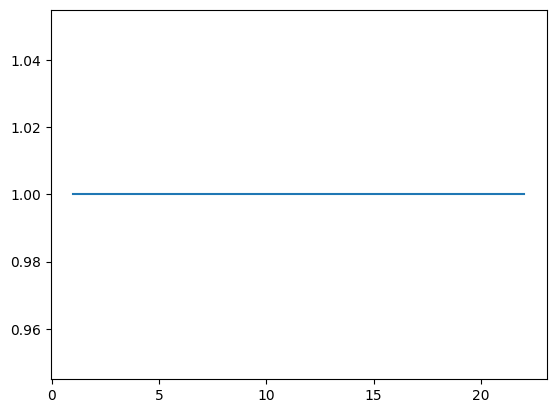

In [ ]:
plt.plot(range(1, K + 1), accuracy, label='Accuracy')

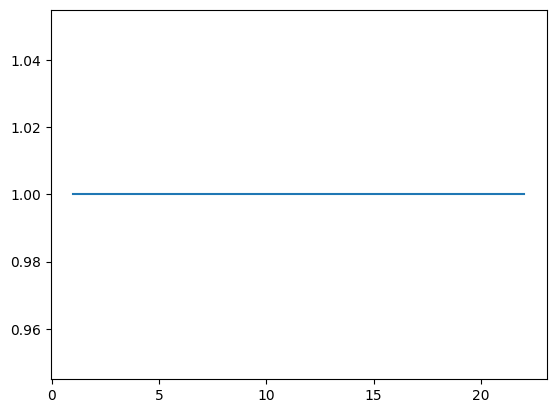

In [ ]:
plt.plot(range(1, K + 1), f1, label='F1-Score')

In [ ]:
metric_dict = {'k': range(1, K + 1), 'Accuracy': accuracy, 'F1-Score': f1}

In [ ]:
metric_df = pd.DataFrame(metric_dict)
metric_df

,k,Accuracy,F1-Score
0,1,1.0,1.0
1,2,1.0,1.0
2,3,1.0,1.0
3,4,1.0,1.0
4,5,1.0,1.0
5,6,1.0,1.0
6,7,1.0,1.0
7,8,1.0,1.0
8,9,1.0,1.0
9,10,1.0,1.0


In [ ]:
metric_df[(metric_df['Accuracy'] == max(metric_df['Accuracy']))| (metric_df['F1-Score'] == max(metric_df['F1-Score']))]

,k,Accuracy,F1-Score
0,1,1.0,1.0
1,2,1.0,1.0
2,3,1.0,1.0
3,4,1.0,1.0
4,5,1.0,1.0
5,6,1.0,1.0
6,7,1.0,1.0
7,8,1.0,1.0
8,9,1.0,1.0
9,10,1.0,1.0


## **Decision Tree**

##Build the Regression Model from k-best features:
Train the model with the selected best set of features on the train set. Then, evaluate the performance of the model on the test set using all the performance evaluation metrics.

## **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    f1_score,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    precision_score,
    recall_score,
)

# the best model so far is with k=1, or all features
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=1)
rfe.fit(X_train_scaled, y_train)  # Fit RFE to the training data

# Select the best features
X_selected = X_train_scaled[:, rfe.support_]
X_selected_test = X_test_scaled[:, rfe.support_]

# Build and train Logistic Regression model with selected features
lr = LogisticRegression(solver='saga', max_iter=3000)
lr.fit(X_selected, y_train)

# Make predictions and predict probabilities
y_pred = lr.predict(X_selected_test)
y_proba = lr.predict_proba(X_selected_test)[:, 1]

In [ ]:
# Evaluate the performance of the model on the test data
cm2=confusion_matrix(y_test, y_pred)
f12= f1_score(y_test, y_pred, average='weighted')
accuracy2=accuracy_score(y_test, y_pred)
precision2=precision_score(y_test, y_pred)
recall2=recall_score(y_test, y_pred)
auc2 = roc_auc_score(y_test, y_proba)

true_negatives = cm2[0, 0]
false_negatives = cm2[1, 0]
true_positives = cm2[1, 1]
false_positives = cm2[0, 1]

sensitivity2 = true_positives / (true_positives + false_negatives)
specificity2 = true_negatives / (true_negatives + false_positives)

print(cm2)
print(f"F1-Score: {f12}")
print(f"Accuracy: {accuracy2}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")
print(f"AUC: {auc2}")
print(f"Sensitivity: {sensitivity2}")
print(f"Specificity: {specificity2}")

[[299   0]
 [  0 434]]
F1-Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC: 1.0
Sensitivity: 1.0
Specificity: 1.0


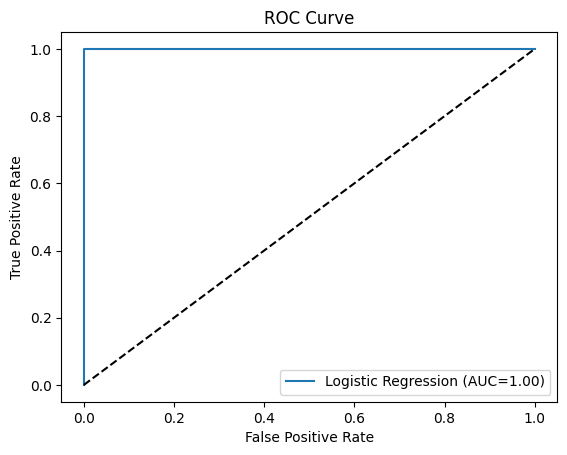

In [ ]:
# plot the ROC curve
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={auc2:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Summarize your findings** by comparing the model performance between the base model and the model with k best input features.

In [ ]:
# Evaluation metrics for the base model
print("Base Model Metrics:")
print(f"Accuracy:", accuracy_base)
print(f"f1-score:", f1_base)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")
print(f"AUC: {auc}")

# Evaluation metrics for the model with k-best features
print("\nModel with K-best Features Metrics:")
print(f"Accuracy: {accuracy2}")
print(f"f1-score: {f12}")
print(f"Precision: {precision2}")
print(f"Recall: {recall2}")
print(f"Sensitivity: {sensitivity2}")
print(f"Specificity: {specificity2}")
print(f"AUC: {auc2}")

Base Model Metrics:
Accuracy: 1.0
f1-score: 1.0
Precision: 1.0
Recall: 1.0
Sensitivity: 1.0
Specificity: 1.0
AUC: 1.0

Model with K-best Features Metrics:
Accuracy: 1.0
f1-score: 1.0
Precision: 1.0
Recall: 1.0
Sensitivity: 1.0
Specificity: 1.0
AUC: 1.0


Overall, both the base model and the model with K-best input features performed exceptionally well on the classification task, achieving perfect scores across all performance metrics. This suggests that the selected features in the K-best model were highly informative and sufficient for accurate classification, without sacrificing model performance. We could use all features or just one feature to accurately predict the edibility of the mushrooms. We use one feature because it's the simpler model. Additionally, the base model, which likely included all available features, did not outperform the model with K-best features, indicating that feature selection effectively identified the most relevant features for classification.






